In [74]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
import IPython.html.widgets as widg
%matplotlib inline

In [75]:
class Network:
    def __init__(self, shape):
        self.shape = np.array(shape) #shape is array-like, i.e. (2,3,4) is a 2 input, 3 hidden node, 4 output network
        self.weights = [np.random.ranf((self.shape[i],self.shape[i-1]))*.1 for i in range(1,len(self.shape))]
        self.biases = [np.random.ranf((self.shape[i],))*.1 for i in range(1,len(self.shape))]
        self.errors = [np.random.ranf((self.shape[i],)) for i in range(1,len(self.shape))]
        self.eta = .2
    def sigmoid(self, inputs):
        return 1/(1+np.exp(-inputs))
    def feedforward(self, inputs):
        assert inputs.shape==self.shape[0] #inputs must feed directly into the first layer.
        self.activation = [np.zeros((self.shape[i],)) for i in range(len(self.shape))]
        self.activation[0] = inputs
        for i in range(1,len(self.shape)):
            self.activation[i]=self.sigmoid(np.dot(self.weights[i-1],self.activation[i-1])+self.biases[i-1])
        return self.activation[-1]
    def comp_error(self, answer):
        assert answer.shape==self.activation[-1].shape
        self.errors[-1] = (self.activation[-1]-answer)*np.exp(np.dot(self.weights[-1],self.activation[-2])+self.biases[-1])/(np.exp(np.dot(self.weights[-1],self.activation[-2])+self.biases[-1])+1)**2
        for i in range(len(self.shape)-2, 0, -1):
            self.errors[i-1] = self.weights[i].transpose().dot(self.errors[i])*np.exp(np.dot(self.weights[i-1],self.activation[i-1])+self.biases[i-1])/(np.exp(np.dot(self.weights[i-1],self.activation[i-1])+self.biases[i-1])+1)**2
    def grad_descent(self):
        for i in range(len(self.biases)):
            self.biases[i]=self.biases[i]-self.eta*self.errors[i]
        for i in range(len(self.weights)):
            for j in range(self.weights[i].shape[0]):
                for k in range(self.weights[i].shape[1]):
                    self.weights[i][j,k] = self.weights[i][j,k] - self.eta*self.activation[i][k]*self.errors[i][j]
    def train(self, inputs, answer):
        self.feedforward(inputs)
        self.comp_error(answer)
        self.grad_descent()

In [76]:
n1 = Network([2,15,1])
print n1.feedforward(np.array([1,2]))
for i in range(1000):
    n1.train(np.array([1,200]), np.array([.5]))
print n1.feedforward(np.array([1,2]))

[ 0.62052467]
[ 0.51948372]


In [77]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data[0]*.01)

[ 0.    0.    0.05  0.13  0.09  0.01  0.    0.    0.    0.    0.13  0.15
  0.1   0.15  0.05  0.    0.    0.03  0.15  0.02  0.    0.11  0.08  0.    0.
  0.04  0.12  0.    0.    0.08  0.08  0.    0.    0.05  0.08  0.    0.
  0.09  0.08  0.    0.    0.04  0.11  0.    0.01  0.12  0.07  0.    0.
  0.02  0.14  0.05  0.1   0.12  0.    0.    0.    0.    0.06  0.13  0.1   0.
  0.    0.  ]


In [78]:
iden = np.eye(10)
acc = np.zeros((400,))
num = Network([64, 6, 10])
print num.feedforward(digits.data[89]*.01)
for i in range(400):
    for dig, ans in zip(digits.data[1:1000],digits.target[1:1000]):
        num.train(dig*.01,iden[ans])
    cor = 0
    tot = 0
    for dig, ans in zip(digits.data, digits.target):
        if num.feedforward(dig*.1).argmax()==ans:
            cor += 1
        tot += 1
    acc[i] = cor/float(tot)
print num.feedforward(digits.data[90]*.01), digits.target[90]

[ 0.56327781  0.53494188  0.56041287  0.55950504  0.5549875   0.55955551
  0.57417477  0.53738777  0.57210649  0.53537767]
[  3.81148465e-09   9.78902946e-01   2.35071801e-07   2.03416998e-05
   3.12196237e-03   1.02683104e-03   1.47483850e-09   1.11092691e-02
   7.65880221e-03   6.44440519e-03] 1


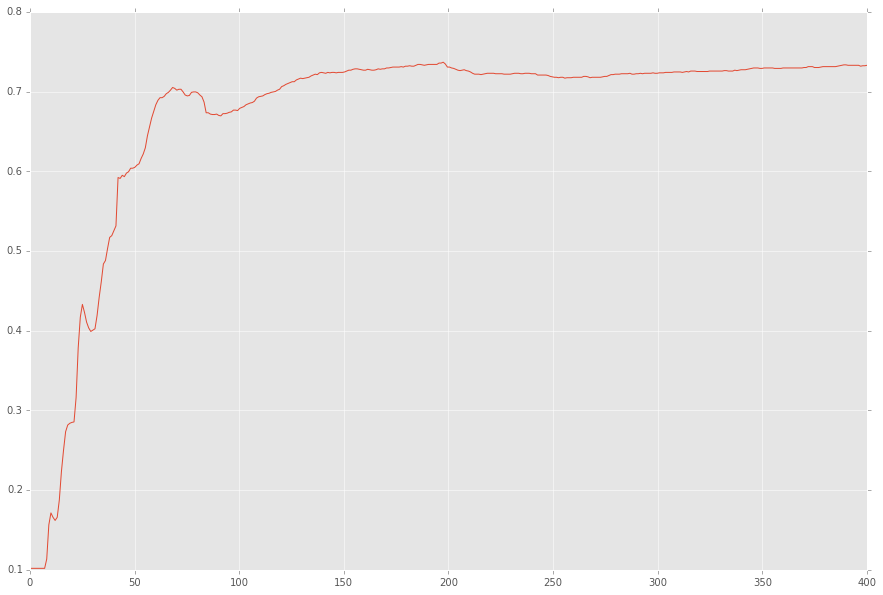

In [79]:
plt.figure(figsize=(15,10))
plt.plot(np.linspace(0,400,400),acc)

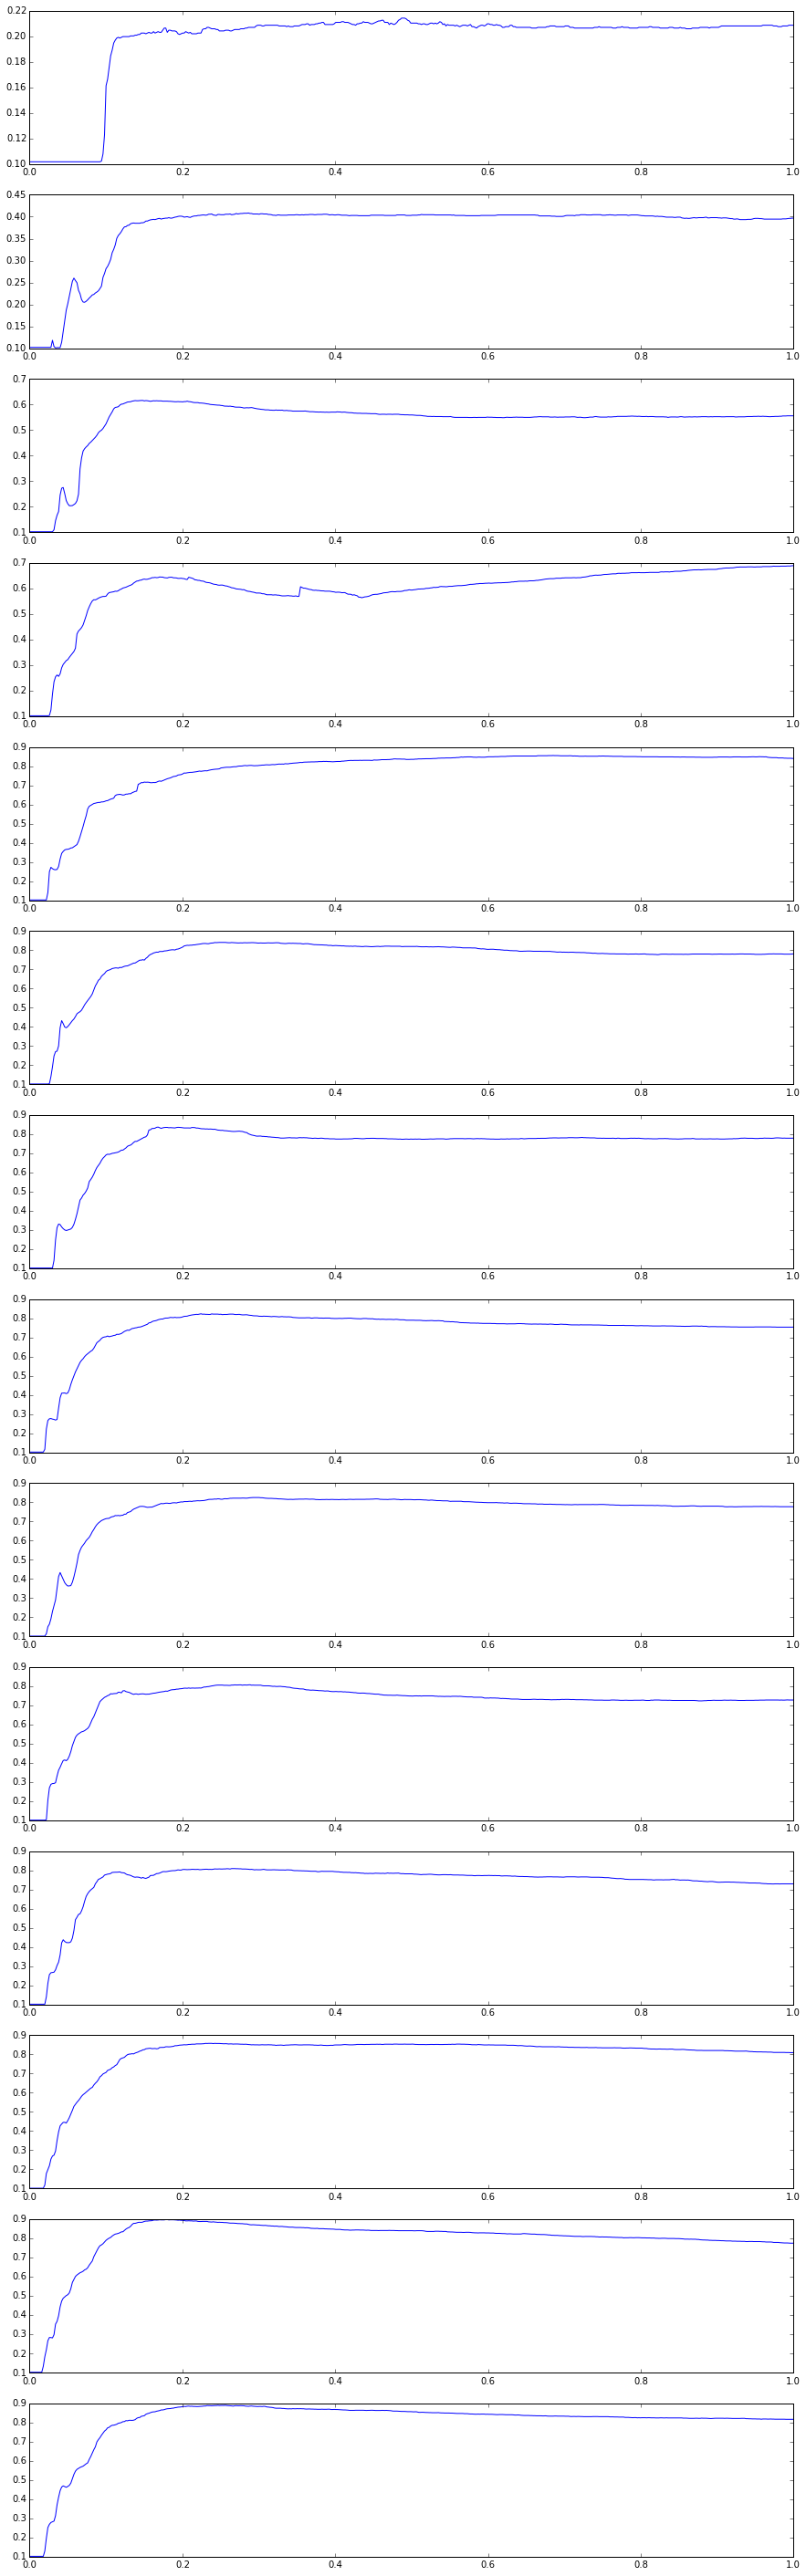

In [37]:
iden = np.eye(10)
acc = np.zeros((14,500))
f = plt.figure(figsize = (15,50))
for h in range(1,15):
    num = Network([64, h, 10])
    for i in range(500):
        for dig, ans in zip(digits.data[1:1000],digits.target[1:1000]):
            num.train(dig*.01,iden[ans])
        cor = 0
        tot = 0
        for dig, ans in zip(digits.data, digits.target):
            if num.feedforward(dig*.1).argmax()==ans:
                cor += 1
            tot += 1
        acc[h-1,i] = cor/float(tot)
    plt.subplot(14,1,h)
    plt.plot(np.linspace(0,1,500),acc[h-1])

In [41]:
np.savetxt("Accuracy_Data_run_1.dat", acc)

[[ 0.10183639  0.10183639  0.10183639 ...,  0.20868114  0.20868114
   0.20868114]
 [ 0.10183639  0.10183639  0.10183639 ...,  0.39621592  0.3967724
   0.3967724 ]
 [ 0.10183639  0.10183639  0.10183639 ...,  0.55537006  0.55537006
   0.55537006]
 ..., 
 [ 0.10183639  0.10183639  0.10183639 ...,  0.80912632  0.80912632
   0.80912632]
 [ 0.10183639  0.10183639  0.10183639 ...,  0.77518086  0.77518086
   0.77518086]
 [ 0.10183639  0.10183639  0.10183639 ...,  0.8163606   0.8163606
   0.8163606 ]]


In [68]:
def plot_epochs(az_angle, eleva):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(np.linspace(0,500,500), np.linspace(0,14, 14))
    ax.plot_surface(X, Y, acc)
    ax.view_init(elev=eleva, azim=az_angle)

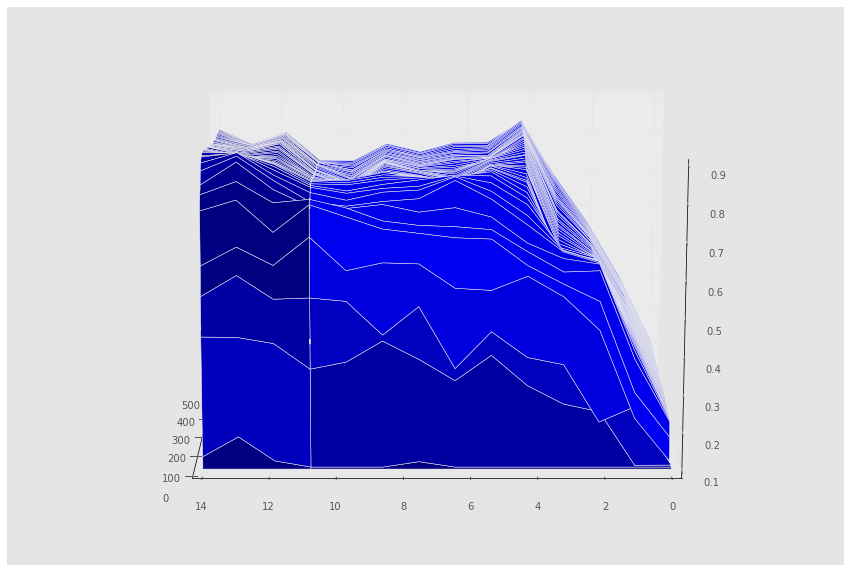

In [69]:
widg.interact(plot_epochs, az_angle=(0, 360, 1), eleva=(0,20,1))